## Calcular, graficar y obtener el valor de Chi Cuadrado para los siguientes generadores con las siguientes semillas:

In [11]:
## Se importan las librerias 
import math
import random
import matplotlib.pyplot as plt
import numpy as np

#### Cuadrados medios: Xo=74731897457, D=7

In [12]:
def cuadrados_medios(xo, d):
    vector_final = []
    xn = xo
    #print("It. \t Xn \t Ui \t Rn")
    
    for i in range(100):
        xnn = xn**2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-d/2):int(tam/2+d/2)])
        rn = ui / (int('9'*d)+1)
        #print(str(i) + "\t" + str(xn) + "\t"+ str(ui)+"\t"+str(rn))
        xn = ui
        vector_final.append(rn)

    return vector_final

#### Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19

In [13]:
def congruencia_lineal(a, b, xo, m):
    vector_final = []
    xn = xo
    #print("It. \t Xn \t Ui")

    for i in range(100):
        xnn = (a*xn+b) % m
        ui = xnn/m
        #print(str(i) + "\t"+ str(xnn)+"\t"+str(ui))
        xn = xnn
        vector_final.append(ui)

    return vector_final

#### Tauswoth: q=7, r=3, l=5

In [14]:
def tausworthe(q, r, l):
    vector_inicial = [1, 1, 1, 1, 1, 1, 1]
    #print('Primeros bits: ',vector_inicial)

    ##Valor de la cantidad de bits a generar, puede cambiar
    generar = 100
    vector_total = vector_inicial

    for i in range(q+1, (l * generar)+1):
        if vector_inicial[(i-r)-1] == vector_inicial[(i-q)-1]:
            vector_total.append(0)
        else:
            vector_total.append(1)

    #print('Total de bits según la cantidad: ', vector_total)

    vector_separados = []

    for i in range(0, len(vector_total), l):
        vector_separados.append(vector_total[i:i + l])

    #print('Bits separados según el valor de l: ', vector_separados)

    vector_decimales = []

    for i in vector_separados:
        numero_bin = ("").join(str(e) for e in i)
        vector_decimales.append(int(numero_bin, 2))

    #print('Vector de decimales (bits convertidos): ', vector_decimales)

    vector_final = []

    for i in vector_decimales:
        vector_final.append(i/2**l)

    #print('Resultados: ', vector_final)

    return vector_final

#### Random de Python: semilla (11052022)

In [15]:
def python_random():
    vector_final = []
    random.seed(11052022)
    [vector_final.append(random.random())for i in range(100)]
    
    return vector_final

In [16]:
## Se define una funcion para realizar un conteo de los numeros que caen dentro de cada intervalo
def chi_cuadrado(vector_final):
    tablas = {}

    for i in np.arange(0.1, 1.1, 0.1): # aqui separo en intervalos de 0.1
        for j in vector_final:
            if j > i-0.1 and j <= i: # Compruebo si el valor esta dentro del intervalor
                tablas[round(i-0.1,1)] = tablas[round(i-0.1,1)]+1 if round(i-0.1,1) in tablas else 1
    
    return tablas

## Se define una funcion para aplicar la formula y obtener la desviacion estandar de cada intervalo
def sumatoria_chi(tabla, E):
  return sum([(valor-E)**2/E for valor in tabla.values()])

## Se define una funcion para graficar los valores de cada intervalo
def graficar(tabla):
  plt.bar(range(len(tabla)), list(tabla.values()), tick_label=list(tabla.keys()))
  plt.show()

## Resultados de los generadores

#### Cuadrados Medios

Los 100 numeros aleatorios generados
[0.4975235, 0.529633, 0.5111146, 0.2381343, 0.0794483, 0.1203237, 0.7779278, 0.171662, 0.6784224, 0.2569528, 0.2474142, 0.1378636, 0.063722, 0.6049328, 0.9436925, 0.5555345, 0.6185806, 0.6419586, 0.1108441, 0.864145, 0.746581, 0.3831895, 0.8341929, 0.8777944, 0.5230086, 0.5379956, 0.4392656, 0.9542673, 0.6260798, 0.9759159, 0.4118438, 0.6153155, 0.6131645, 0.970704, 0.2662556, 0.9204453, 0.2195502, 0.0229032, 0.455657, 0.6233016, 0.5048845, 0.9083583, 0.1148011, 0.7929256, 0.7310071, 0.3713802, 0.9232529, 0.3959173, 0.7505084, 0.2628584, 0.9453845, 0.7518528, 0.2826328, 0.8129963, 0.9629838, 0.337799, 0.1081644, 0.9953742, 0.769798, 0.5889608, 0.8748239, 0.316856, 0.3977247, 0.1849369, 0.0165698, 0.4558272, 0.7784362, 0.9629174, 0.2099192, 0.6607052, 0.5313613, 0.3448311, 0.9084875, 0.3495376, 0.1765338, 0.6418254, 0.939844, 0.3067443, 0.9206558, 0.607102, 0.5728384, 0.1438325, 0.8778805, 0.6741722, 0.5081552, 0.2217072, 0.5408253, 0.4920051, 0.0690

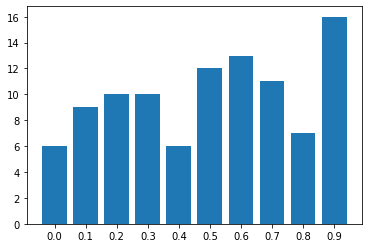

In [17]:
vector_cuadrados_medios = cuadrados_medios(74731897457, 7)

print("Los 100 numeros aleatorios generados")
print(vector_cuadrados_medios)

print("Tabla de intervalos y el conteo de numeros dentro de cada intervalo")

tablas = chi_cuadrado(vector_cuadrados_medios)
print(tablas)

print("Calculamos el valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))

print("Grafica de barras")
graficar(tablas)  

#### Congruencia Lineal

Los 100 numeros aleatorios generados
[0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947368421, 0.3684210526315789, 0.8947368421052632, 0.8421052631578947, 0.9473684210526315, 0.7368421052631579, 0.15789473684210525, 0.3157894736842105, 0.0, 0.631578947

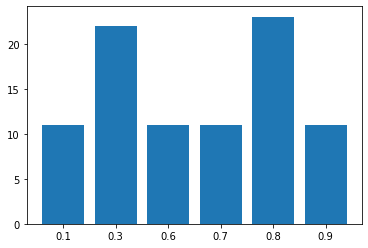

In [18]:
vector_congruencia_lineal = congruencia_lineal(74731897457, 37747318974, 7, 19)

print("Los 100 numeros aleatorios generados")
print(vector_congruencia_lineal)

print("Tabla de intervalos y el conteo de numeros dentro de cada intervalo")

tablas = chi_cuadrado(vector_congruencia_lineal)
print(tablas)

print("Calculamos el valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))

print("Grafica de barras")
graficar(tablas)  

#### Tausworthe

Los 100 numeros aleatorios generados
[0.96875, 0.75, 0.90625, 0.53125, 0.28125, 0.46875, 0.65625, 0.25, 0.34375, 0.46875, 0.21875, 0.15625, 0.375, 0.75, 0.1875, 0.8125, 0.90625, 0.09375, 0.125, 0.25, 0.0625, 0.28125, 0.625, 0.9375, 0.875, 0.21875, 0.9375, 0.21875, 0.375, 0.3125, 0.34375, 0.90625, 0.3125, 0.0625, 0.84375, 0.78125, 0.78125, 0.34375, 0.1875, 0.03125, 0.6875, 0.71875, 0.25, 0.78125, 0.0625, 0.0, 0.5625, 0.40625, 0.21875, 0.71875, 0.03125, 0.96875, 0.53125, 0.84375, 0.0625, 0.5625, 0.96875, 0.3125, 0.5, 0.6875, 0.9375, 0.4375, 0.3125, 0.78125, 0.5, 0.40625, 0.65625, 0.8125, 0.1875, 0.25, 0.5, 0.125, 0.59375, 0.28125, 0.90625, 0.75, 0.46875, 0.875, 0.4375, 0.75, 0.625, 0.71875, 0.8125, 0.625, 0.15625, 0.71875, 0.59375, 0.5625, 0.6875, 0.375, 0.09375, 0.40625, 0.4375, 0.53125, 0.5625, 0.125, 0.03125, 0.125, 0.8125, 0.46875]
Tabla de intervalos y el conteo de numeros dentro de cada intervalo
{0.0: 9, 0.1: 9, 0.2: 11, 0.3: 10, 0.4: 13, 0.5: 9, 0.6: 8, 0.7: 12, 0.8: 8, 0.9: 10}


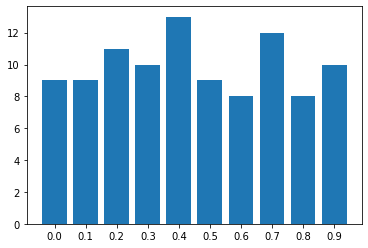

In [19]:
vector_tausworthe = tausworthe(7, 3, 5)

print("Los 100 numeros aleatorios generados")
print(vector_tausworthe)

print("Tabla de intervalos y el conteo de numeros dentro de cada intervalo")

tablas = chi_cuadrado(vector_tausworthe)
print(tablas)

print("Calculamos el valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))

print("Grafica de barras")
graficar(tablas)  

#### Random de Python

Los 100 numeros aleatorios generados
[0.39122091339712006, 0.08673940245642964, 0.9233776991044218, 0.5643281259214213, 0.5018754578724773, 0.6092906311578306, 0.7944410154604006, 0.4745506456495402, 0.3496767363331855, 0.08044631797968471, 0.6263578731542199, 0.2036014039706825, 0.32266209276724567, 0.1789720571675194, 0.51299029248829, 0.7770010208223913, 0.5449750015006763, 0.6965377945580097, 0.17325150202955186, 0.9000269906696816, 0.7996854776854797, 0.35322968565101953, 0.6711727475466924, 0.28345737390743064, 0.37350518006964006, 0.37916716408773543, 0.17048123118844705, 0.823379948568777, 0.22300266321497408, 0.051569135814649614, 0.1922950198508785, 0.8634191905130083, 0.5439027360115081, 0.12556216958312505, 0.34124337838965746, 0.6811002910449016, 0.07304203459633685, 0.12499764479557629, 0.2036691179102461, 0.5579574657844889, 0.7421399105045708, 0.5911979676257648, 0.985890474077214, 0.36352070742615483, 0.8983386409438613, 0.045274687387145685, 0.010854410020205485, 0.10

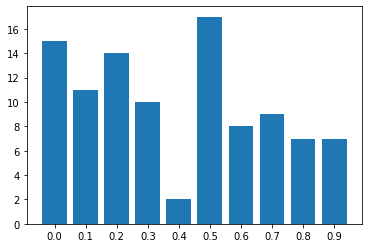

In [20]:
vector_random = python_random()

print("Los 100 numeros aleatorios generados")
print(vector_random)

print("Tabla de intervalos y el conteo de numeros dentro de cada intervalo")

tablas = chi_cuadrado(vector_random)
print(tablas)

print("Calculamos el valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))

print("Grafica de barras")
graficar(tablas)  